# Results
* 533 experiments carried on 16 different combinations of credit card dataset:
    * All features used (all), Only PCA components (pca), Keep first duplicate record (first), Keep last duplicate record (last), Keep anomaly record (anomaly), Mean of duplicate (mean), Median of duplicate (median), and oversampling via Adasyn (adasyn).
    * Min max scaling and standard scaling of above 7 dataset to derive total of 14 combinations.
* Import compile_result.py to convert result.json file to csv
</hr>

## Load Libraries

In [1]:
from compile_result import compile_result, print_result
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Json files
* Experimental results stored in 3 different result json files: result1.json, result2.json, result3.json
* Json files are stored in results folder

In [2]:
# Iterate through json files and save info to a dataframe
combine = []

for i in range(3):
    temp = compile_result(f"result{i+1}.json")
    combine.append(temp)
    
df = pd.concat(combine, axis=0).reset_index(drop=True)
df

,Date_Time,Dataset,Epoch,Slide_Win,Dim,Slide_Stride,FC_Layer_Num,FC_Dim,Val_Ratio,Topk,F1 Score,Precision,Recall,Confusion Matrix,Decay,Anomalies
0,"17-Sep-2022, 23:48:00",all_s,1000,5,64,1,2,128,0.05,5,0.008398,0.004225,0.685185,"[[67889, 17440], [34, 74]]",NaN,NaN
1,"18-Sep-2022, 20:42:32",pca_s,1000,5,64,1,2,128,0.05,5,0.012025,0.006070,0.648148,"[[73866, 11463], [38, 70]]",NaN,NaN
2,"19-Sep-2022, 01:57:29",first_s,1000,5,64,1,2,128,0.05,5,0.008970,0.004523,0.550000,"[[29861, 4842], [18, 22]]",NaN,NaN
3,"19-Sep-2022, 12:02:01",last_s,1000,5,64,1,2,128,0.05,5,0.008686,0.004373,0.652174,"[[27866, 6831], [16, 30]]",NaN,NaN
4,"19-Sep-2022, 20:49:33",anomaly_s,1000,5,64,1,2,128,0.05,5,0.019407,0.009849,0.663551,"[[27498, 7138], [36, 71]]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,"02-Oct-2022, 16:14:13",mean,10,30,256,1,3,512,0.10,5,0.024369,0.013449,0.130841,"[[33584, 1027], [93, 14]]",0.0,0.0031
2269,"02-Oct-2022, 18:45:49",all,100,20,256,1,3,128,0.10,5,0.023241,0.012044,0.333333,"[[82361, 2953], [72, 36]]",0.0,0.0013
2270,"02-Oct-2022, 20:00:26",all_s,100,20,256,1,3,128,0.10,5,0.008027,0.004037,0.694444,"[[66810, 18504], [33, 75]]",0.0,0.0013
2271,"02-Oct-2022, 21:14:50",pca,100,20,256,1,3,128,0.10,5,0.036182,0.019411,0.268519,"[[83849, 1465], [79, 29]]",0.0,0.0013


In [3]:
# Remove experiments that have epochs less than 100
df1 = df.loc[df['Epoch'] >= 100, :]

# Keep experiments that are SWaT and credit card
d = df1['Dataset']
cond1 = (d == 'all') | (d == 'all_s') | (d == 'pca') | (d == 'pca_s')
cond2 = (d == 'first') | (d == 'first_s') | (d == 'last') | (d == 'last_s')
cond3 = (d == 'anomaly') | (d == 'anomaly_s') | (d == 'mean') | (d == 'mean_s')
cond4 = (d == 'median') | (d == 'median_s') | (d == 'adasyn') | (d == 'adasyn_s')
condition = cond1 | cond2 | cond3 | cond4

df2 = df1.loc[condition,:].reset_index(drop=True)

# Set 0 for null values
df2 = df2.fillna(0)
df2


,Date_Time,Dataset,Epoch,Slide_Win,Dim,Slide_Stride,FC_Layer_Num,FC_Dim,Val_Ratio,Topk,F1 Score,Precision,Recall,Confusion Matrix,Decay,Anomalies
0,"17-Sep-2022, 23:48:00",all_s,1000,5,64,1,2,128,0.05,5,0.008398,0.004225,0.685185,"[[67889, 17440], [34, 74]]",0.0,0.0000
1,"18-Sep-2022, 20:42:32",pca_s,1000,5,64,1,2,128,0.05,5,0.012025,0.006070,0.648148,"[[73866, 11463], [38, 70]]",0.0,0.0000
2,"19-Sep-2022, 01:57:29",first_s,1000,5,64,1,2,128,0.05,5,0.008970,0.004523,0.550000,"[[29861, 4842], [18, 22]]",0.0,0.0000
3,"19-Sep-2022, 12:02:01",last_s,1000,5,64,1,2,128,0.05,5,0.008686,0.004373,0.652174,"[[27866, 6831], [16, 30]]",0.0,0.0000
4,"19-Sep-2022, 20:49:33",anomaly_s,1000,5,64,1,2,128,0.05,5,0.019407,0.009849,0.663551,"[[27498, 7138], [36, 71]]",0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,"02-Oct-2022, 23:03:14",first,100,20,256,1,3,128,0.10,5,0.016635,0.008449,0.550000,"[[32106, 2582], [18, 22]]",0.0,0.0012
529,"02-Oct-2022, 18:45:49",all,100,20,256,1,3,128,0.10,5,0.023241,0.012044,0.333333,"[[82361, 2953], [72, 36]]",0.0,0.0013
530,"02-Oct-2022, 20:00:26",all_s,100,20,256,1,3,128,0.10,5,0.008027,0.004037,0.694444,"[[66810, 18504], [33, 75]]",0.0,0.0013
531,"02-Oct-2022, 21:14:50",pca,100,20,256,1,3,128,0.10,5,0.036182,0.019411,0.268519,"[[83849, 1465], [79, 29]]",0.0,0.0013


## Highest F1 Score, Precision and Recall

In [4]:
# Print dataset with highest F1 Score, Precision and Recall
print_result(df2)


********************************************************************************

Highest F1 Score   : adasyn       [0.67766274384467]
Highest Precision  : adasyn       [0.6185389049929975]
Highest Recall     : adasyn_s     [0.999973782869727]

********************************************************************************



## Average F1 Score, Precision and Recall

In [5]:
df3 = df2.get(['Dataset', 'F1 Score', 'Precision', 'Recall']).groupby(['Dataset']).mean()
df3['Anomalies'] = df2.get(['Dataset', 'Anomalies']).groupby(['Dataset']).median()
df3.to_csv('average_result.csv')
df3

,F1 Score,Precision,Recall,Anomalies
Dataset,,,,
adasyn,0.658251,0.562998,0.793737,0.4473
adasyn_s,0.635233,0.494407,0.890206,0.4473
all,0.034190,0.018772,0.240741,0.0013
all_s,0.008224,0.004137,0.685185,0.0013
anomaly,0.066118,0.038384,0.321194,0.0031
anomaly_s,0.021050,0.010696,0.652722,0.0031
first,0.032460,0.017544,0.366667,0.0012
first_s,0.009067,0.004568,0.625000,0.0012
last,0.029575,0.016168,0.282609,0.0013


In [39]:
# Print dataset with highest mean F1 Score, Precision and Recall
scores = ['F1 Score', 'Precision', 'Recall']

for score in scores:
    max_score = df3[score].max()
    dataset = df3.loc[df3[score] == max_score, :].index.values[0]
        
    print(f"Highest {score:<10} : {dataset:<10} [{str(round(max_score, 4))}]")


Highest F1 Score   : adasyn     [0.6583]
Highest Precision  : adasyn     [0.563]
Highest Recall     : adasyn_s   [0.8902]


In [48]:
# Print average F1 Score, Precision and Recall for under-sampling dataset
dataset = df3.index.to_list()
under_s = [data for data in dataset if data != 'adasyn' and data != 'adasyn_s']

df3.loc[under_s,:].mean()

F1 Score     0.021858
Precision    0.011887
Recall       0.398217
Anomalies    0.002057
dtype: float64

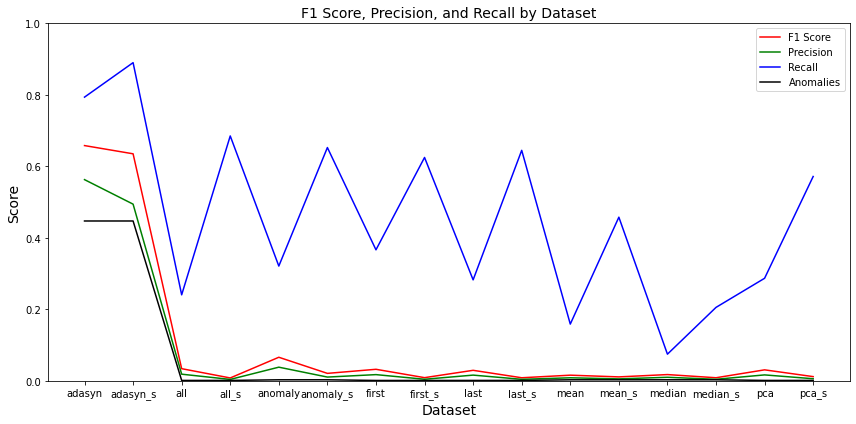

In [6]:
# Plot graph
plt.figure(figsize=(12, 6))

x = df3.index.to_list()

# Plot F1 Score, Precision, and Recall by Dataset on same graph
plt.plot(x, df3['F1 Score'], color='red', label='F1 Score')
plt.plot(x, df3['Precision'], color='green', label='Precision')
plt.plot(x, df3['Recall'], color='blue', label='Recall')
plt.plot(x, df3['Anomalies'], color='black', label='Anomalies')

plt.title("F1 Score, Precision, and Recall by Dataset", fontsize=14)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend()
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


## Min Max vs Standard Scaling

In [7]:
for i in ['F1 Score', 'Precision', 'Recall']:
    
    print(i)
    print('_'*70)
    
    for j in ['all', 'pca', 'first', 'last', 'anomaly', 'mean', 'median', 'adasyn']:
        
        data_mm = df3.loc[j, i]         # F1 Score, Precision, Recall for min-max scaling
        data_s = df3.loc[f"{j}_s", i]   # F1 Score, Precision, Recall for standard scaling
                
        if data_mm > data_s:
            print(f"{j:<10} : {'min_max':>15} [{str(round(data_mm,5))+']':<12} > {'standard':>12} [{str(round(data_s,5))+']':<25}")
        else:
            print(f"{j:<10} : {'min_max':>15} [{str(round(data_mm,5))+']':<12} < {'standard':>12} [{str(round(data_s,5))+']':<25}")
            
    print()

F1 Score
______________________________________________________________________
all        :         min_max [0.03419]     >     standard [0.00822]                 
pca        :         min_max [0.0309]      >     standard [0.01197]                 
first      :         min_max [0.03246]     >     standard [0.00907]                 
last       :         min_max [0.02958]     >     standard [0.00878]                 
anomaly    :         min_max [0.06612]     >     standard [0.02105]                 
mean       :         min_max [0.01599]     >     standard [0.01119]                 
median     :         min_max [0.01769]     >     standard [0.00881]                 
adasyn     :         min_max [0.65825]     >     standard [0.63523]                 

Precision
______________________________________________________________________
all        :         min_max [0.01877]     >     standard [0.00414]                 
pca        :         min_max [0.01676]     >     standard [0.00605]      

## Conclusion
* 533 experiments were conducted on each of the 16 variations of the credit card dataset.
* Oversampling via Adasyn produced much higher F1 Score, Precision and Recall compared to undersampling (average F1 Score 1%)
* Min max scaling offers better F1 Score and Precision while Standard scaling offers better Recall.
* Generally, GDN doesn't work well with credit card dataset unless number of anomalies are artificially inflated.
* Possible reasons:
    * Irregular time interval between each record.
    * Highly imbalanced dataset i.e. < 0.3% are anomalies.
    * Majority of anomalies are point anomalies as compared to SWaT dataset, which has a higher proportion of contextual anomalies. Hence oversampling anomalies helps to address the issue.